In this data frame we plot various vizualization of our dataframe.

In [2]:
#importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Data.csv') #loading data

In [3]:
data.head()

,SPLocation,Beach Number,County,County Number,Region Number,Date,Year,Month,Day,DayofYear,...,Precipitation1d,Precipitation2d,Precipitation3d,Precipitation4d,Precipitation5d,Precipitation6d,Precipitation7d,Population,DaysSinceStorm,SeasonalPopulation
0,BEACH DRIVE,44,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
1,BECKRICH RD,45,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
2,BID-A-WEE BEACH,46,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
3,CARL GRAY PARK,47,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
4,DELWOOD,48,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0


In [4]:
data.columns

Index(['SPLocation', 'Beach Number', 'County', 'County Number',
       'Region Number', 'Date', 'Year', 'Month', 'Day', 'DayofYear', 'Weather',
       'WaterTemp', 'AirTemp', 'RainFall24h', 'RainFall3d', 'RainLastWeek',
       'enterococcus', 'Pollution', 'Precipitation', 'MaxTemp', 'MaxTemp1d',
       'MaxTemp2d', 'MaxTemp3d', 'MaxTemp4d', 'MaxTemp5d', 'MaxTemp6d',
       'MaxTemp7d', 'Precipitation1d', 'Precipitation2d', 'Precipitation3d',
       'Precipitation4d', 'Precipitation5d', 'Precipitation6d',
       'Precipitation7d', 'Population', 'DaysSinceStorm',
       'SeasonalPopulation'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170521 entries, 0 to 170520
Data columns (total 37 columns):
SPLocation            170521 non-null object
Beach Number          170521 non-null int64
County                170521 non-null object
County Number         170521 non-null int64
Region Number         170521 non-null int64
Date                  170521 non-null object
Year                  170521 non-null int64
Month                 170521 non-null int64
Day                   170521 non-null int64
DayofYear             170521 non-null int64
Weather               170521 non-null float64
WaterTemp             170521 non-null float64
AirTemp               170521 non-null float64
RainFall24h           170521 non-null float64
RainFall3d            170521 non-null float64
RainLastWeek          170521 non-null float64
enterococcus          170521 non-null int64
Pollution             170521 non-null int64
Precipitation         170521 non-null float64
MaxTemp               170521 non-nul

# 1. No swimming

Florida Health Department issues a "No swimming" advisory on any beach that is detected to be polluted (enterococcus level>70 colonies in 100 ml water). Below we plot the number of pollution events in each year.

Text(0, 0.5, 'Year')

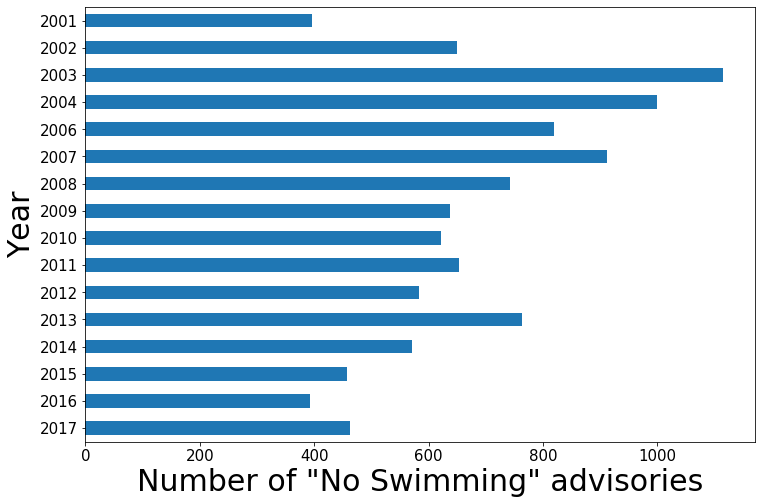

In [6]:
#This code will create a plot that shoes the number of "No swimming" advisories (bacteria level > 70) 
#for years 2001-2017
plt.rcParams['figure.figsize']=(12,8) #plot size
data[data['Year'] > 2000].groupby('Year').Pollution.sum().sort_index(ascending=False).plot(kind='barh', fontsize=15)
plt.xlabel('Number of "No Swimming" advisories', size = 30)#setting and sizing x label
plt.ylabel('Year', size = 30)#setting and sizing y label

In [6]:
#The avergae number of advisories over the year is 674
data[data['Year'] > 2000].Pollution.sum()/16

673.5

The last line of code shoes that the average number of "No swimming" advisories is 674/year.

# 2. Pollution events by month

Below we create two plots. The first plot everage number of pollution events for each month of the year, whereas the second one shows the total number of pollution events for each month of the year.

Both plots suggest that pollution events are more frequent over the summer. This might be due to high temperatures and high population over the summer.

Text(0.5, 0, 'Average Pollution')

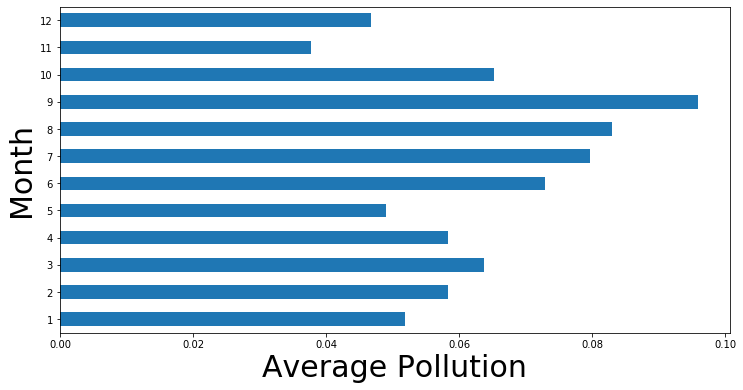

In [15]:
plt.rcParams['figure.figsize']=(12,6)
data.groupby('Month').Pollution.mean().plot(kind = 'barh')
plt.ylabel('Month', size = 30)
plt.xlabel('Average Pollution', size = 30)

Text(0.5, 0, 'Total Pollution')

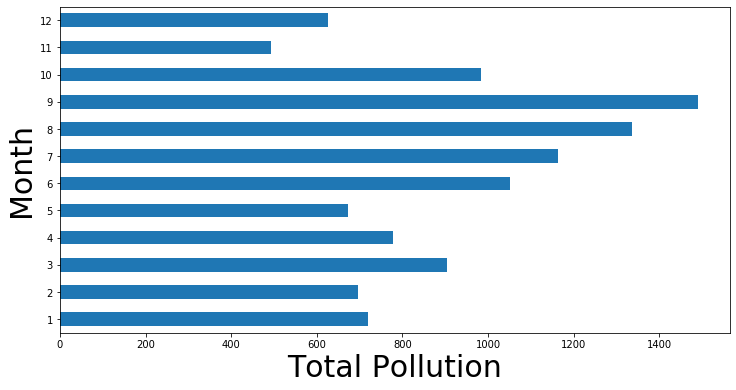

In [7]:
plt.rcParams['figure.figsize']=(12,6)
data.groupby('Month').Pollution.sum().plot(kind = 'barh')
plt.ylabel('Month', size = 30)
plt.xlabel('Total Pollution', size = 30)

# 3. Pollution events by county

The following plot depicts the average pollution frequency each county. It is apparent that pollution varies highly by county.

Text(0, 0.5, 'Pollution frequency')

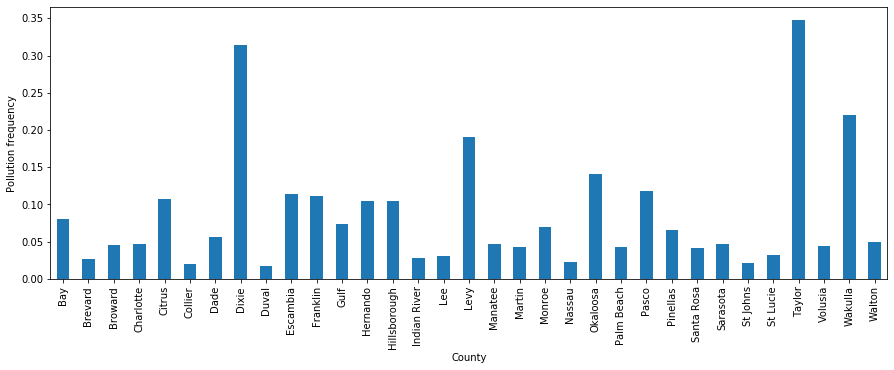

In [9]:
plt.rcParams['figure.figsize']=(15,5)
data.groupby('County').Pollution.mean().sort_index().plot(kind='bar', fontsize=10).set_ylabel('Pollution frequency')

# 4. More rainfall before pollution

The following code generates three bar plotswhich show the average rainfall within 1d, 3d, and 7d before the tests. Apperantly, pollution events follow after higher precipitation. This might indicate a positive correlation between rain and pollution

Text(0, 0.5, 'Rain within last 7d (mm)')

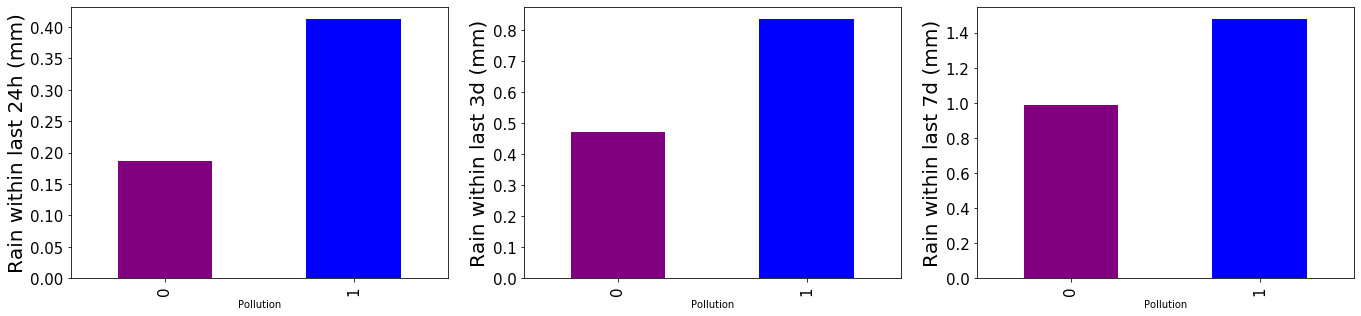

In [14]:
my_colors = ['purple', 'blue']
plt.rcParams['figure.figsize']=(23,5) #adjusting plot size
fig, ax =plt.subplots(1,3) #there will be three plots horizontally aligned
data.groupby('Pollution').RainFall24h.mean().sort_index().plot(kind='bar', color = my_colors, fontsize=15, ax = ax[0]).set_ylabel('Rain within last 24h (mm)', size =20)
data.groupby('Pollution').RainFall3d.mean().sort_index().plot(kind='bar', color = my_colors, fontsize=15, ax = ax[1]).set_ylabel('Rain within last 3d (mm)', size =20)
data.groupby('Pollution').RainLastWeek.mean().sort_index().plot(kind='bar', color = my_colors, fontsize=15, ax = ax[2]).set_ylabel('Rain within last 7d (mm)', size =20)

# 5. Bacteria level by beaches

Now we generate two density plots which compare bacteria level densities for different sets of beaches. The plots suggests that the bacteria level varies highly by location.

ENGLEWOOD NORTH
FORT ISLAND GULF BEACH
RESIDENCE BEACH
CRANDON PARK - KEY BISCAYNE
OLETA STATE PARK
SHIRED ISLAND PARK
BAYOU CHICO


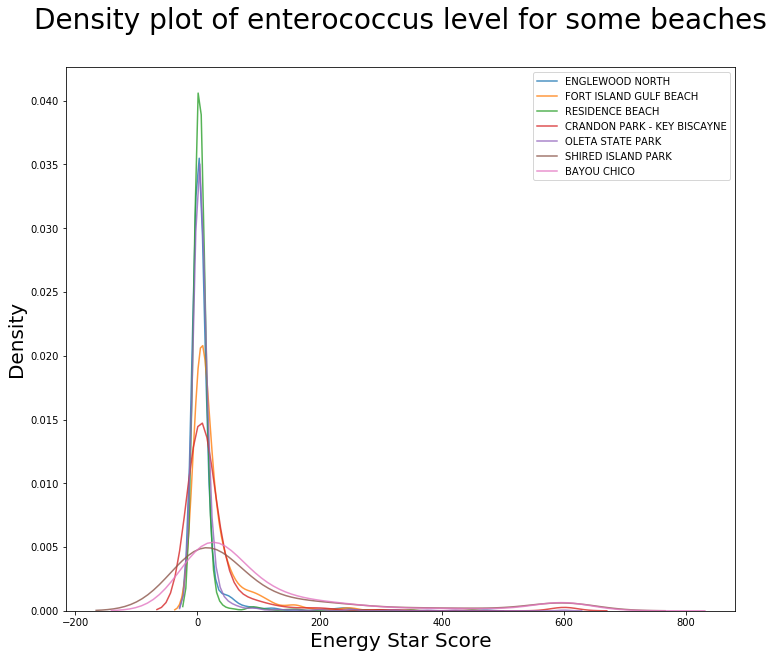

In [16]:
plt.rcParams['figure.figsize']=(12,10)

for b in data.SPLocation.unique()[30:70:6]:
    print(b)
    subset = data[data['SPLocation'] == b]
    
    sns.kdeplot(subset[subset['enterococcus']<800].enterococcus,
               label = b, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20);
plt.title('Density plot of enterococcus level for some beaches\n ', size = 28);

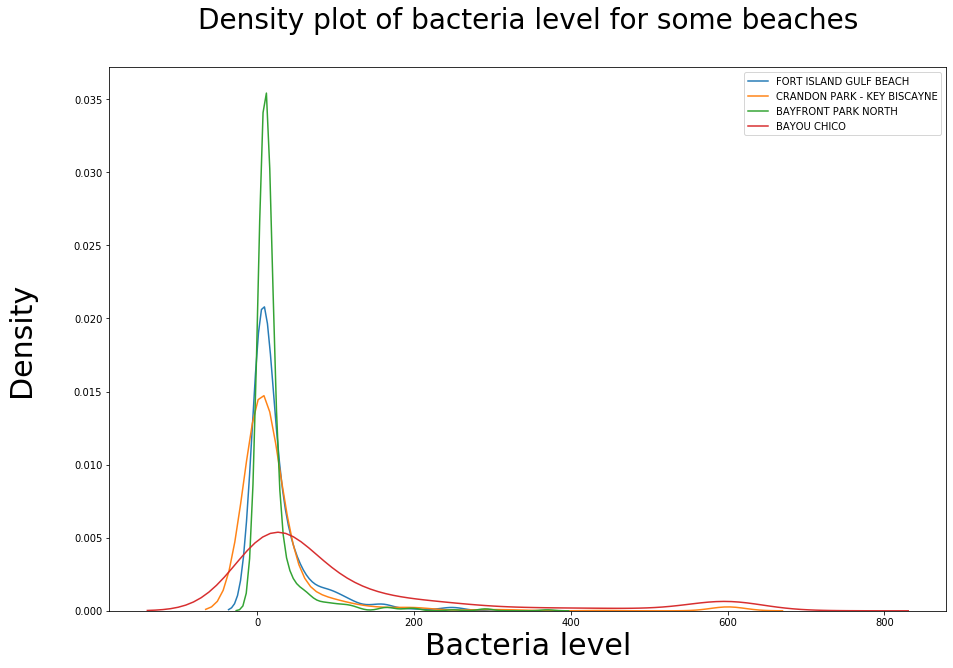

In [15]:
lst = [
'FORT ISLAND GULF BEACH',
'CRANDON PARK - KEY BISCAYNE',
'BAYFRONT PARK NORTH',
    'BAYOU CHICO'
]
plt.rcParams['figure.figsize']=(15,10)
for b in lst:
    subset = data[data['SPLocation'] == b]
    
    sns.kdeplot(subset[subset['enterococcus']<800].enterococcus,
               label = b, shade = False, alpha = 10);
    
# label the plot
plt.xlabel('Bacteria level', size = 30); 
plt.ylabel('Density\n ', size = 30);
plt.title('Density plot of bacteria level for some beaches\n ', size = 28);

# 6. Water temperature vs air temperature

The following code creates a plot that shows water temperature and air temperature prior to each pollution events.

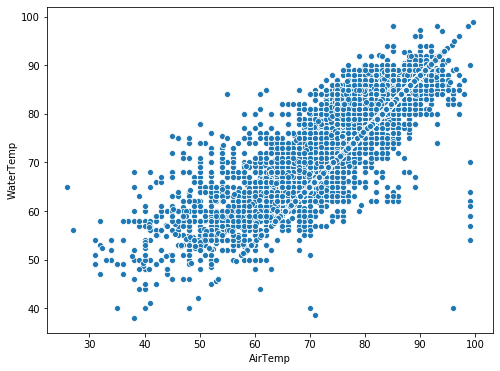

In [23]:
plt.rcParams['figure.figsize']=(8,6)
d = data[data.WaterTemp < 100]
sns.scatterplot( x = 'AirTemp', y='WaterTemp',data = d[d['Pollution'] == 1])